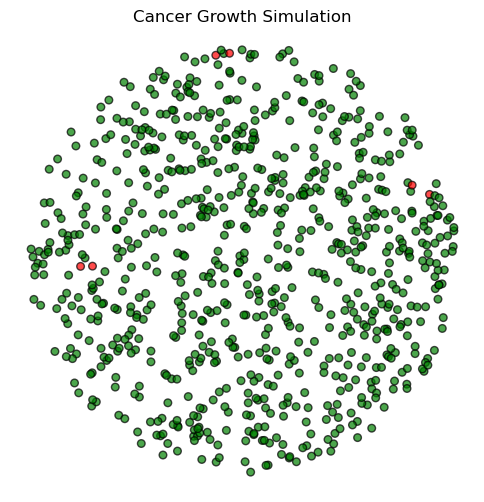

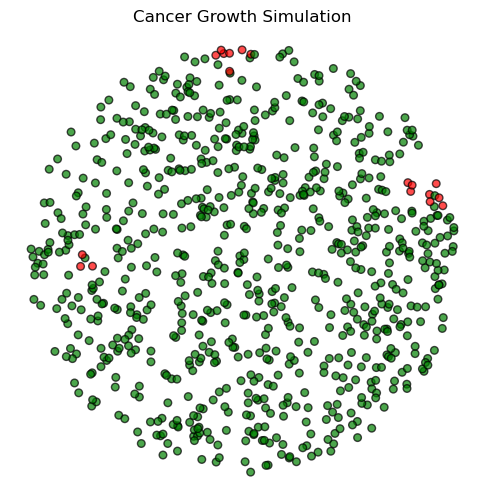

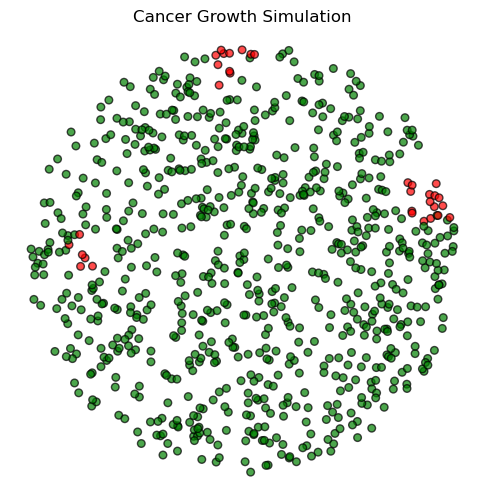

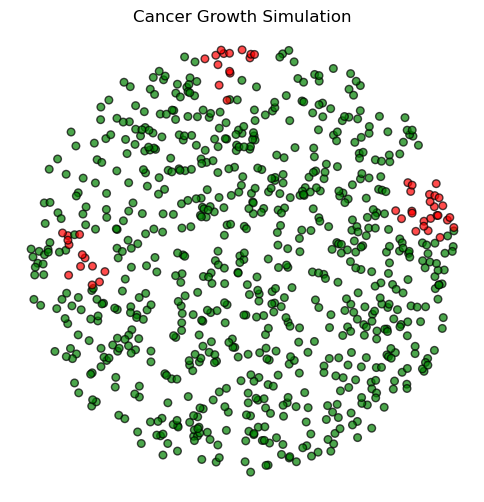

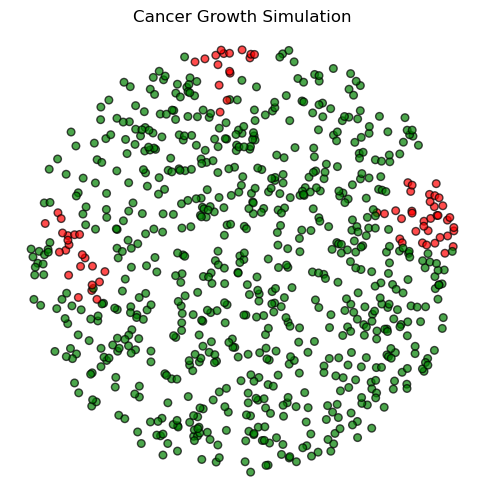

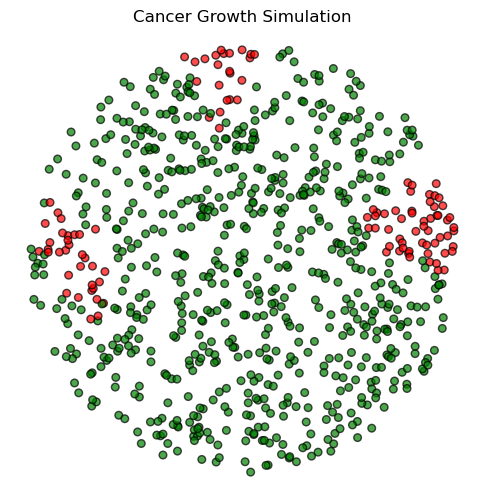

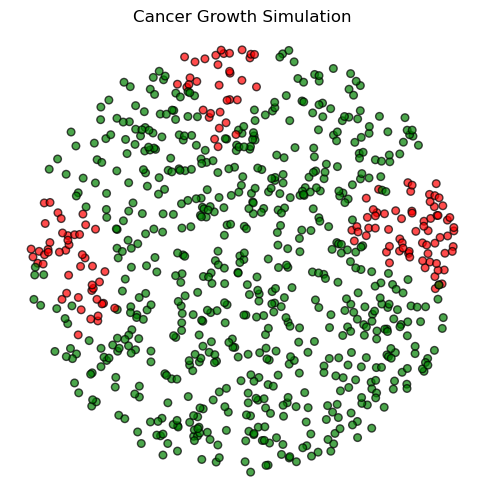

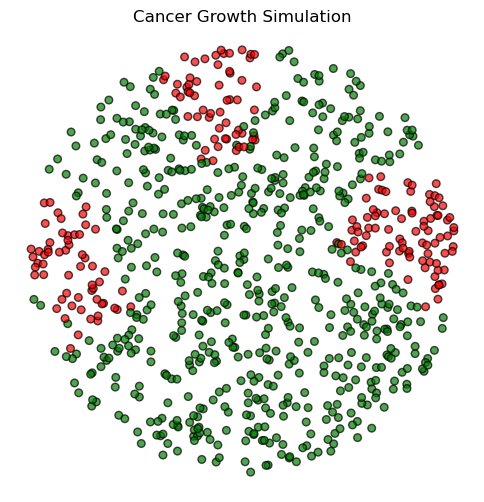

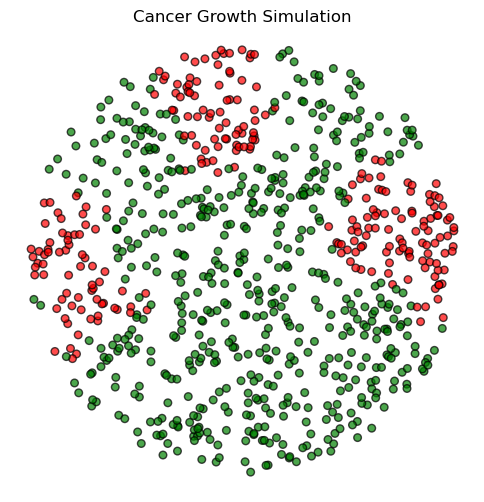

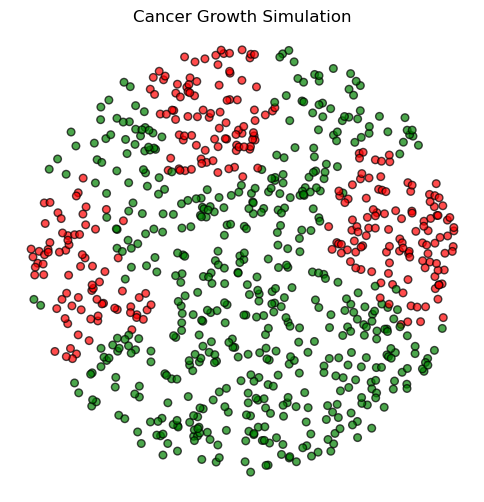

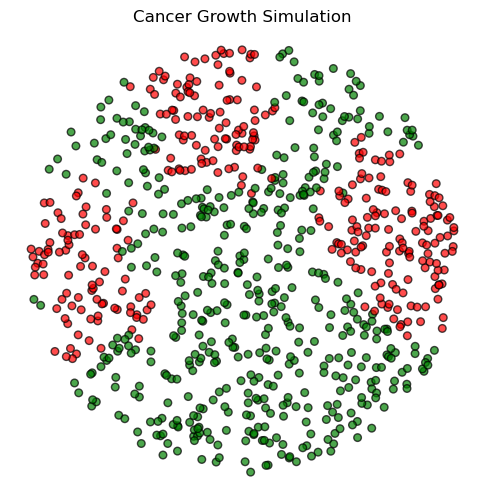

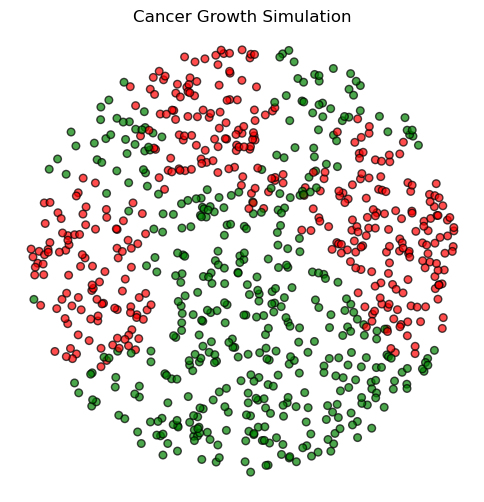

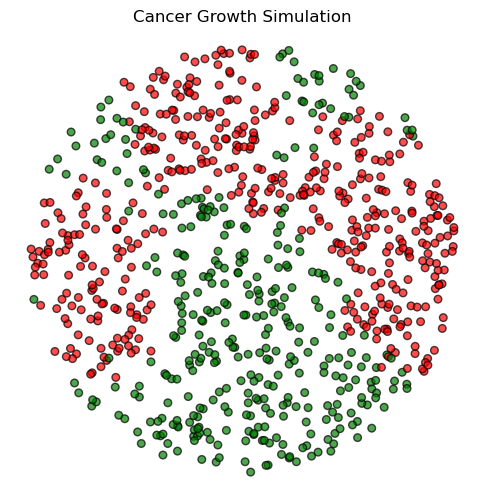

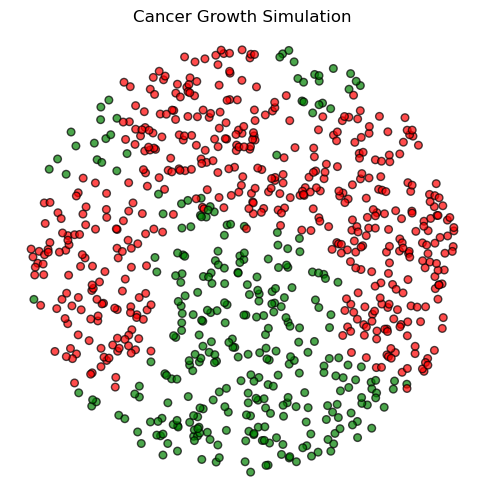

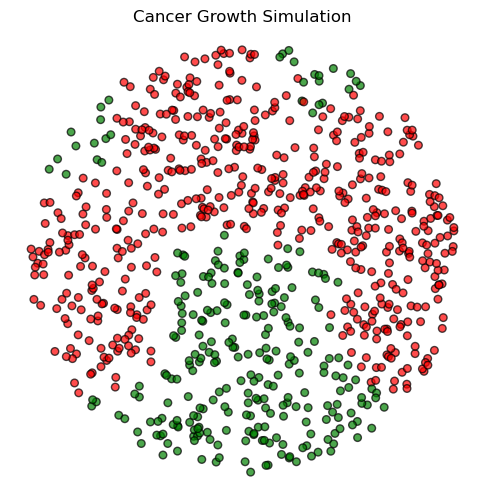

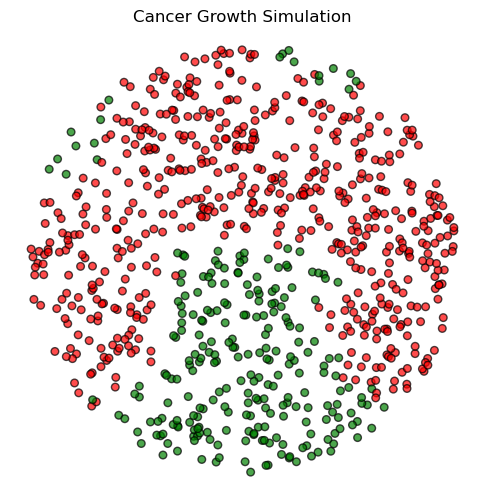

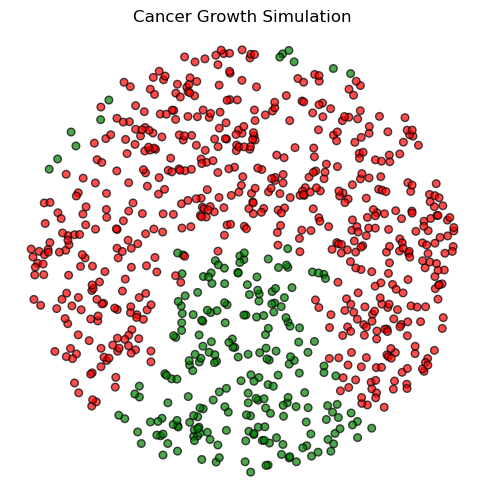

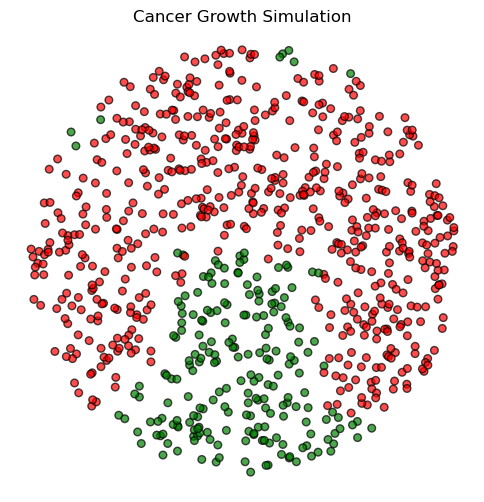

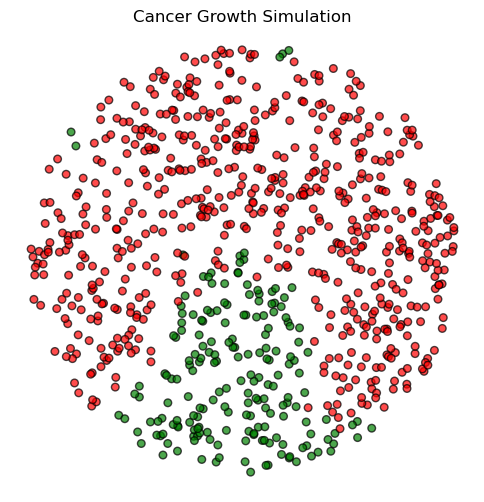

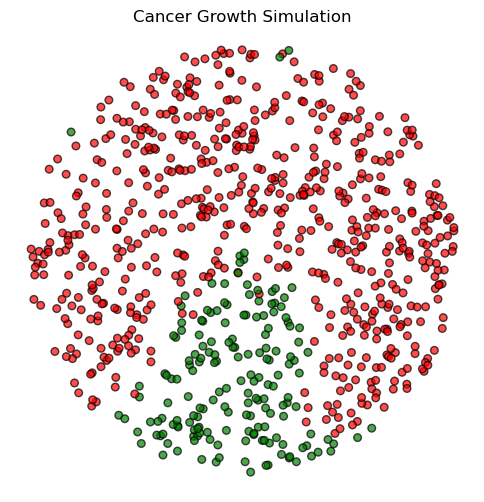

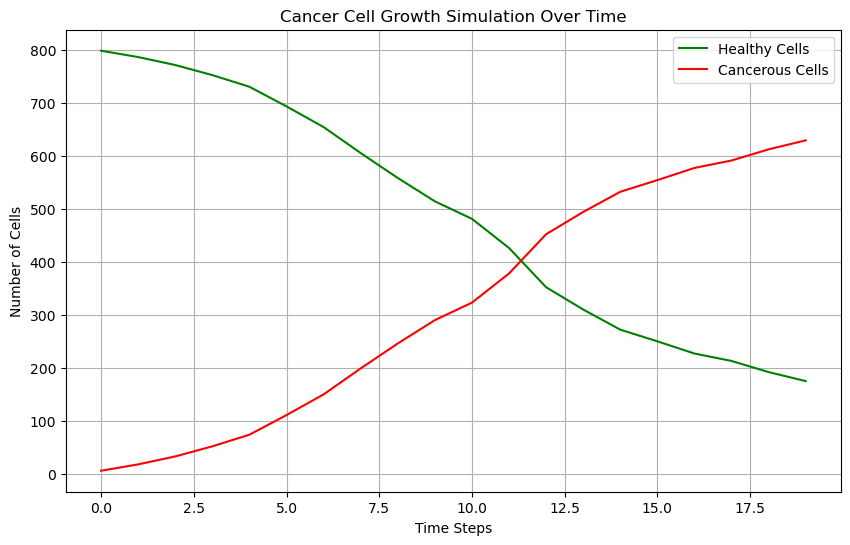

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Constants for cell states
HEALTHY = 0
CANCEROUS = 1

class CancerGrowth:
    """A model simulating cancer cell growth and spread in tissue."""

    def __init__(self, num_cells=1000, spread_prob=0.4, initial_cancerous=3):
        """
        Initialize the tissue and cancer parameters.
        num_cells: Total number of cells
        spread_prob: Probability that a cancerous cell will spread to a healthy neighbor
        initial_cancerous: Number of initial cancerous cells
        """
        self.num_cells = num_cells
        self.spread_prob = spread_prob
        
        # Initialize cells with random positions within a circular tissue
        self.positions = np.random.rand(num_cells, 2) * 2 - 1
        self.positions = self.positions[np.linalg.norm(self.positions, axis=1) < 1]
        self.num_cells = len(self.positions)  # Update to actual cell count within the circle

        # Initialize cell states
        self.states = np.full(self.num_cells, HEALTHY)
        
        # Randomly set some cells as initially cancerous
        initial_indices = random.sample(range(self.num_cells), initial_cancerous)
        for idx in initial_indices:
            self.states[idx] = CANCEROUS

    def step(self):
        """Advance the simulation by one time step."""
        new_states = self.states.copy()
        
        for i in range(self.num_cells):
            if self.states[i] == CANCEROUS:
                # Spread cancer to nearby healthy cells
                for j in range(self.num_cells):
                    if self.states[j] == HEALTHY:
                        distance = np.linalg.norm(self.positions[i] - self.positions[j])
                        if distance < 0.1 and random.random() < self.spread_prob:
                            new_states[j] = CANCEROUS

        self.states = new_states

    def count_cells(self):
        """Count the number of healthy and cancerous cells."""
        healthy = np.sum(self.states == HEALTHY)
        cancerous = np.sum(self.states == CANCEROUS)
        return healthy, cancerous

    def display(self):
        """Display the current state of the tissue."""
        # Define color map: green for healthy, red for cancerous
        colors = np.array(['green', 'red'])
        cell_colors = colors[self.states]

        plt.figure(figsize=(6, 6))
        plt.scatter(self.positions[:, 0], self.positions[:, 1], c=cell_colors, s=30, edgecolor='k', alpha=0.7)
        plt.title("Cancer Growth Simulation")
        plt.axis('equal')
        plt.axis('off')
        plt.show()

# Running the cancer cell growth simulation
if __name__ == '__main__':
    simulation = CancerGrowth(num_cells=1000, spread_prob=0.4, initial_cancerous=3)

    steps = 20
    history = []

    for _ in range(steps):
        simulation.step()
        history.append(simulation.count_cells())
        simulation.display()

    # Convert history to a NumPy array for easier plotting
    history = np.array(history)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(history[:, 0], label='Healthy Cells', color='green')
    plt.plot(history[:, 1], label='Cancerous Cells', color='red')
    plt.title("Cancer Cell Growth Simulation Over Time")
    plt.xlabel("Time Steps")
    plt.ylabel("Number of Cells")
    plt.legend()
    plt.grid()
    plt.show()